In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import cv2
import random
import time


1. Implement in Python (or reuse existing open source) maze generator, capable of generating mazes of varying sizes

In [2]:
def viz(matrix,start,end,fs,path=False):
    
    n_rows = matrix.shape[0]
    n_cols = matrix.shape[1]
    matrix = np.copy(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j]==1:
                matrix[i][j] = 0
            elif matrix[i][j]==0:
                matrix[i][j] = 1

    fig, ax = plt.subplots()
    fig.set_size_inches(n_cols, n_rows)
    if path:
        cmap = matplotlib.colors.ListedColormap(['white', 'black','green'])
        for i in range(len(path)):
            a,b = path[i]
            if i>0 and i<len(path)-1:
                ax.text(b, a, i , ha='center', va='center', color='black',fontsize = fs)
            matrix[a][b] = 2
    else:
         cmap = matplotlib.colors.ListedColormap(['white', 'black'])
    ax.imshow(matrix, cmap=cmap, origin='upper')
    ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.set_yticks(np.arange(-0.5, n_rows, 1))
    ax.grid(which='major', axis='y', color='grey', linestyle='-', linewidth=1)
    ax.tick_params(axis='both', which='both', length=0)
    a,b = start
    ax.text(b, a, 'S', ha='center', va='center', color='gold',fontsize = fs)
    a,b = end
    ax.text(b, a, 'E', ha='center', va='center', color='gold',fontsize = fs)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()

In [100]:
#20,30,50
rows = 30
cols = 30
starti = 0
startj = 0

In [101]:
class Cell():
    def __init__(self,i,j):
        self.i = i
        self.j = j
        self.visited = False
        self.walls = [False,False,False,False] #top,bottom,left,right
        if i==0:
            self.walls[0] = True
        if j==0:
            self.walls[2] = True
        if i==rows-1:
            self.walls[1] = True
        if j == cols-1:
            self.walls[3] = True
            
            

In [102]:
maze = np.empty((rows, cols), dtype=object)
for i in range(rows):
    for j in range(cols):
        maze[i][j] = Cell(i,j)

In [103]:
def helper(starti,startj):
    c_i = starti
    c_j = startj
    walls = maze[starti][startj].walls
    
    neighbour = []
    k = -1
    if not walls[0] and not maze[c_i-1][c_j].visited:
        k = 0
        neighbour.append((c_i-1,c_j))
    if not walls[3] and not maze[c_i][c_j+1].visited:
        k = 3
        neighbour.append((c_i,c_j+1))
    if not walls[1] and not maze[c_i+1][c_j].visited:
        k = 1
        neighbour.append((c_i+1,c_j))
    if not walls[2] and not maze[c_i][c_j-1].visited:
        k = 3
        neighbour.append((c_i,c_j-1))
    if len(neighbour)>0:
        r = random.randint(0, len(neighbour)-1)
        a,b = neighbour[r]
        maze[a][b].visited = True
        maze[a][b].walls[k] = True            
        return neighbour[r]
    else:
        return -1,-1

In [104]:
mazebool = np.zeros((rows, cols))

In [105]:
def reset(n):
    mazebool1 = [[1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0.]]
    mazebool1 = np.array(mazebool1)
    
    mazebool2 = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]]

    mazebool2 = np.array(mazebool2)
    
    mazebool3 = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]
    mazebool3 = np.array(mazebool3)
    
    if n==1:
        return mazebool1
    if n==2:
        return mazebool2
    if n==3:
        return mazebool3

In [106]:
starti= 0
startj = 0
stack = []
stack.append(maze[0][0])
maze[0][0].visited = True
while(len(stack)):
    starti = stack[-1].i
    startj = stack[-1].j
    maze[starti][startj].visited = True
#     print("current ",starti,startj)
    starti,startj = helper(starti, startj)
#     print("selected neighbour ",starti,startj)
    if starti==-1 and startj==-1:
#         print('pop')
        stack.pop()
    else:
        stack.append(maze[starti][startj])

    

In [107]:
k = 1
for i in range(rows):
    for j in range(cols):
        arr = maze[i][j].walls
        if arr[0]==False: #top
            mazebool[i-1][j] = k
            
        elif arr[1]==False:#bottom
            mazebool[i+1][j] = k
            
        elif arr[2]==False:#left
            mazebool[i][j-1] = k
            
        elif arr[3]==False:#right
            mazebool[i][j+1] = k
            
            

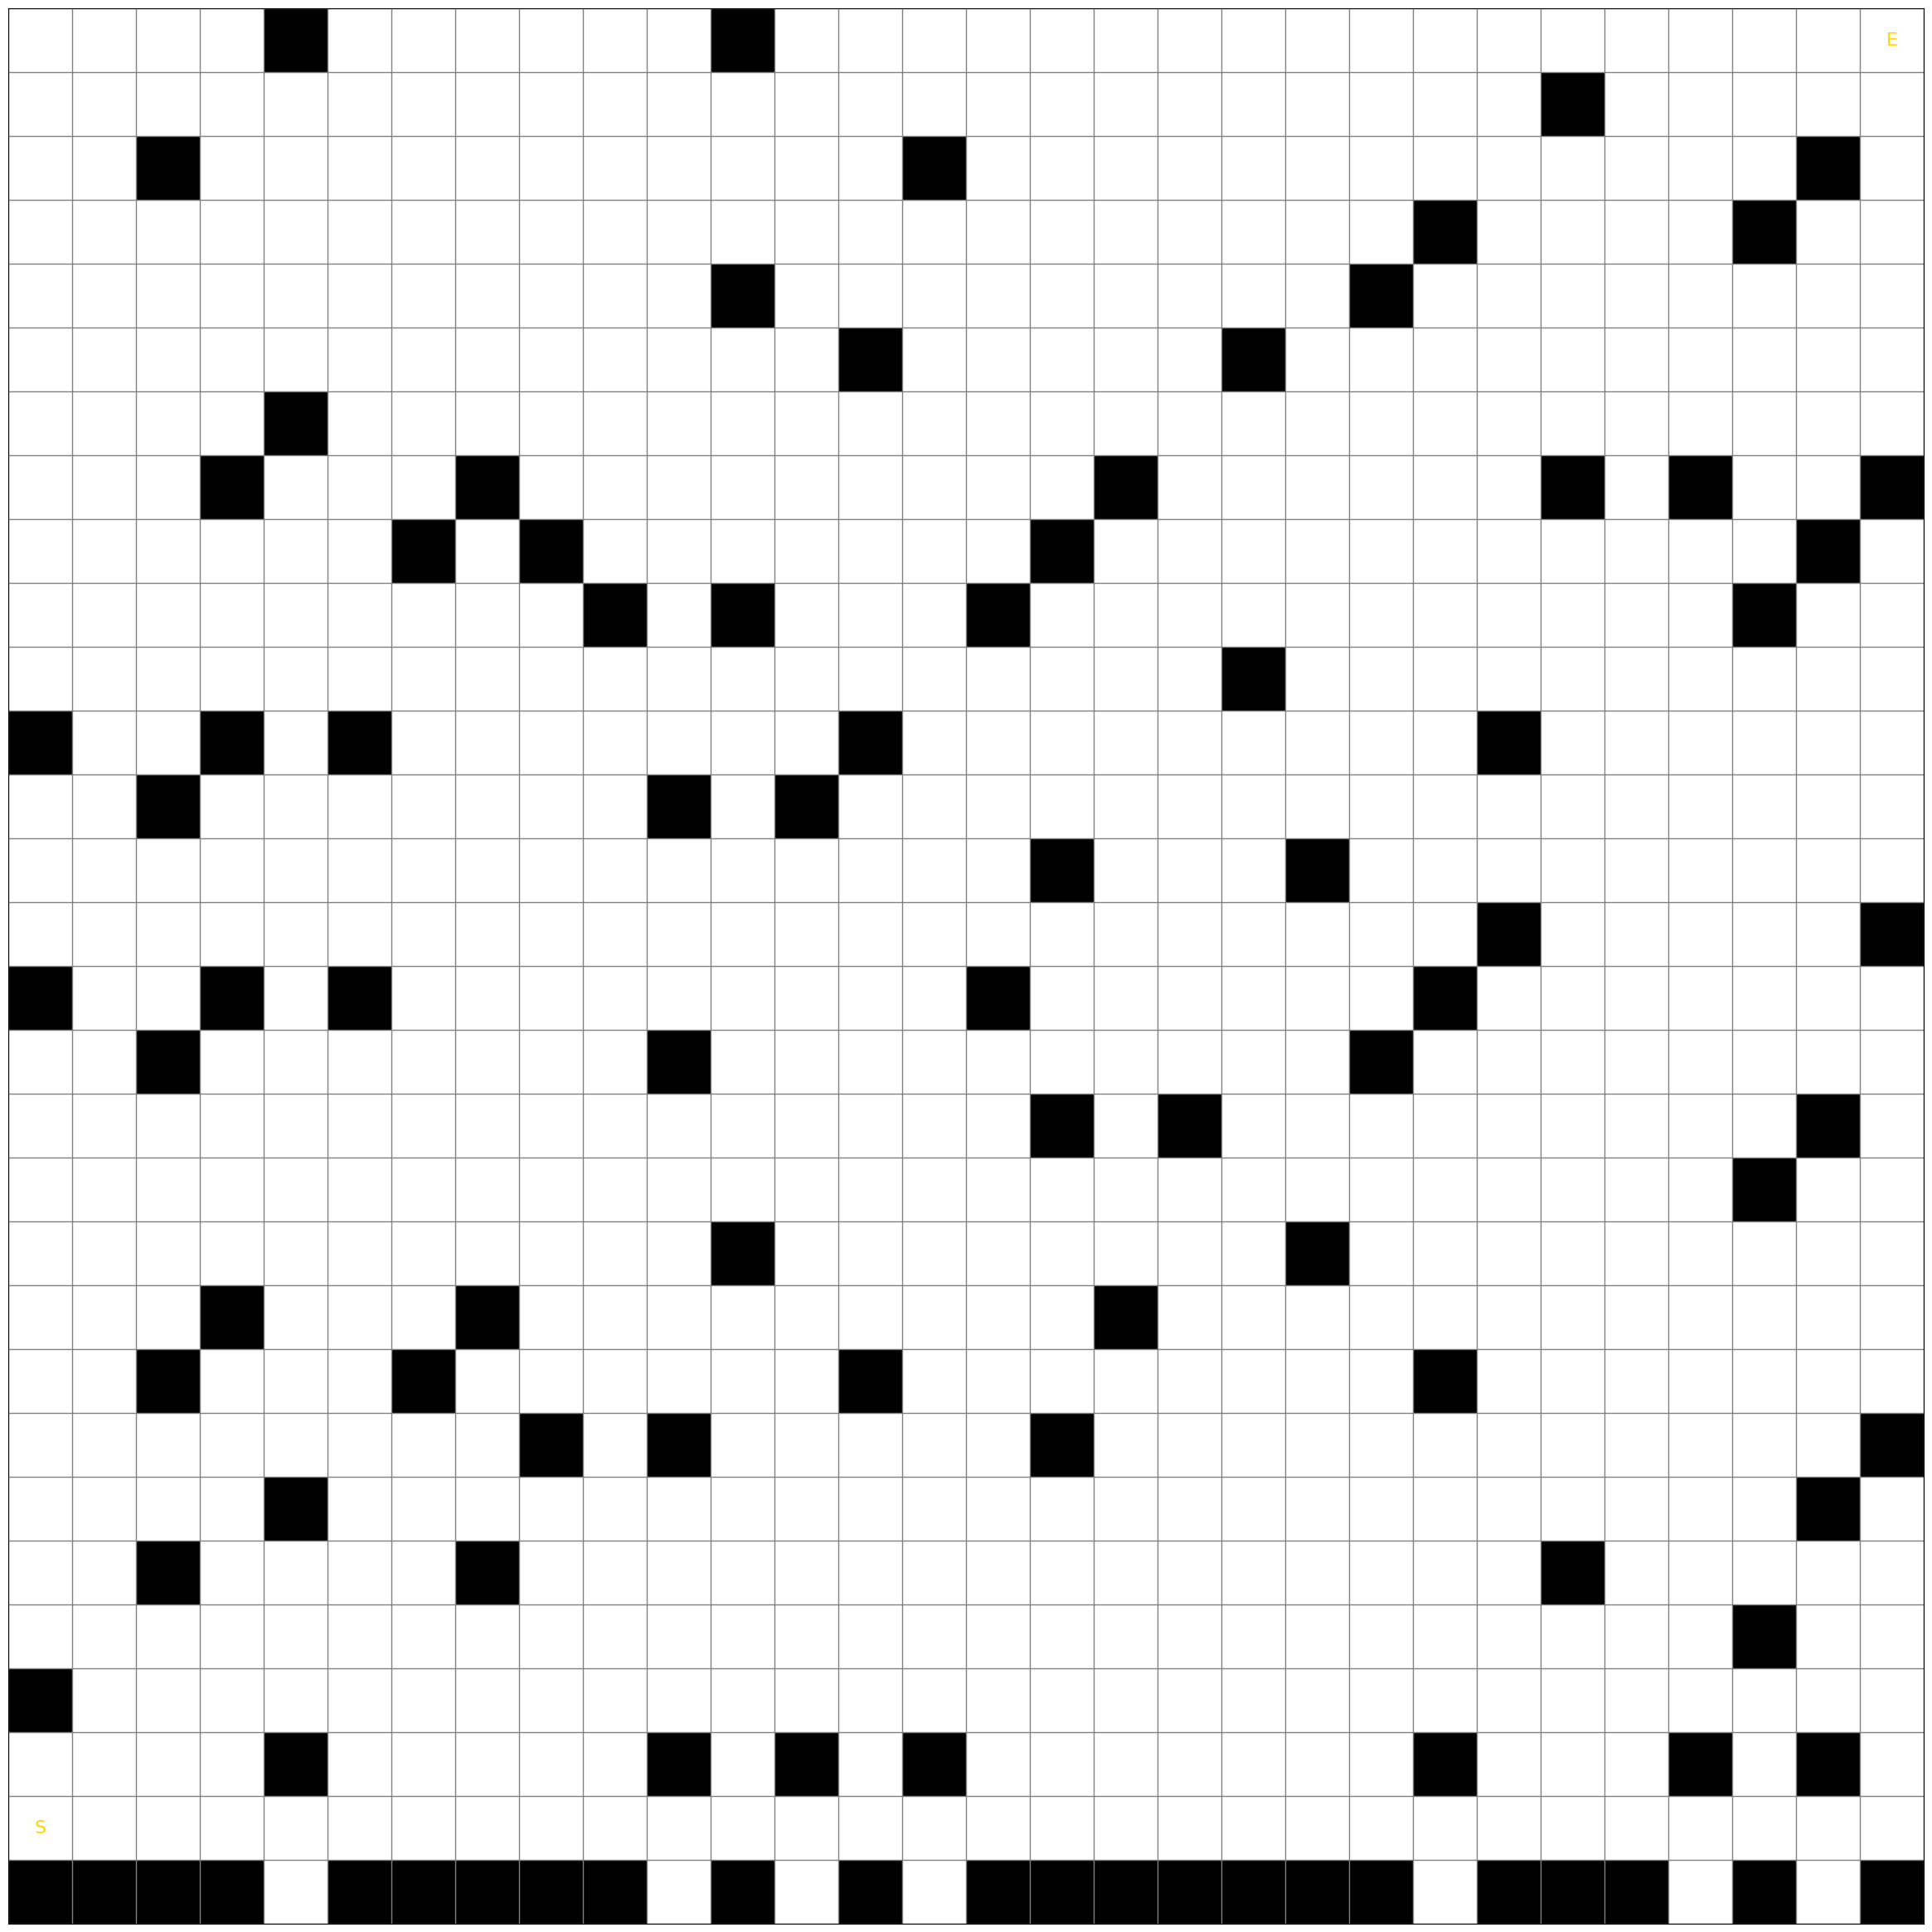

In [108]:
viz(mazebool,(rows-2,0),(0,cols-1),16)

DFS

In [14]:
starti = 2
startj = 2
endi = rows-2
endj = cols-2

# SEARCH PROBLEMS

In [89]:
dfs_visited_count = []

In [109]:
def dfs_path(matrix, start, end):
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  #up, down, left, right
    stack = [(start, [start])]
    visited = set()
    visited_count = 0
    while stack:
        node, path = stack.pop()
        if node == end:
            dfs_visited_count.append(visited_count)
            return path
        visited.add(node)
        visited_count += 1
        for direction in directions:
            neighbor = (node[0] + direction[0], node[1] + direction[1])
            if (0 <= neighbor[0] < len(matrix) and 0 <= neighbor[1] < len(matrix[0]) and
                matrix[neighbor[0]][neighbor[1]] == 1):
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))
    return None

In [110]:
mazebool1 = reset(1)

In [111]:
st = time.time()
path = dfs_path(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1))
et = time.time()
print(et-st)

0.0005428791046142578


In [112]:
dfs_visited_count

[44]

In [113]:
print(mazebool1.shape[0]-2,0)
print(0,mazebool1.shape[1]-1)

6 0
0 7


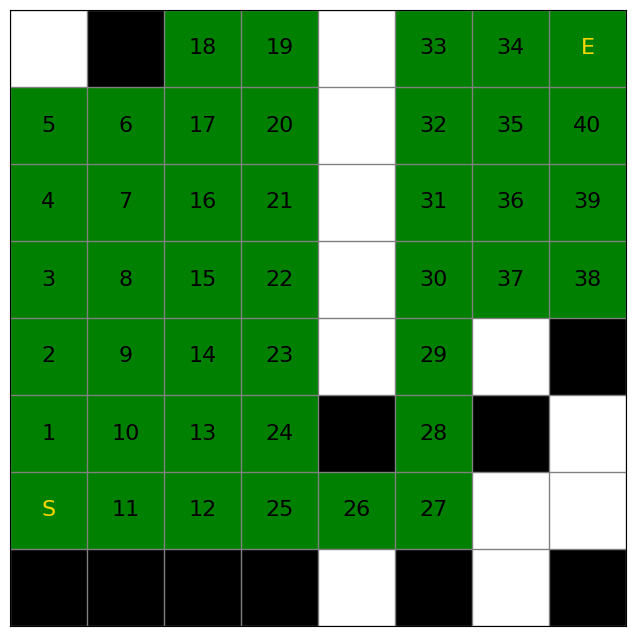

In [114]:
viz(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1),16,path)

In [115]:
bfs_visited_cells = []

In [116]:
from collections import deque

def bfs_path(matrix, start, end):
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]
    queue = deque([(start, [start])])
    visited = set([start])
    search_space = 1
    while queue:
        search_space = search_space + 1
        node, path = queue.popleft()
        if node == end:
            bfs_visited_cells.append(search_space)
            return path
        for direction in directions:
            neighbor = (node[0] + direction[0], node[1] + direction[1])
            if (0 <= neighbor[0] < len(matrix) and 0 <= neighbor[1] < len(matrix[0]) and
                matrix[neighbor[0]][neighbor[1]] == 1):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
                    visited.add(neighbor)
                    search_space = search_space + 1
    return None


In [119]:
mazebool1 = reset(2)

In [120]:
st = time.time()
path = bfs_path(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1))
et = time.time()
print(et-st)

0.0009272098541259766


In [121]:
print(mazebool1.shape[0]-2,0)
print(0,mazebool1.shape[1]-1)

10 0
0 11


In [122]:
bfs_visited_cells

[108, 248]

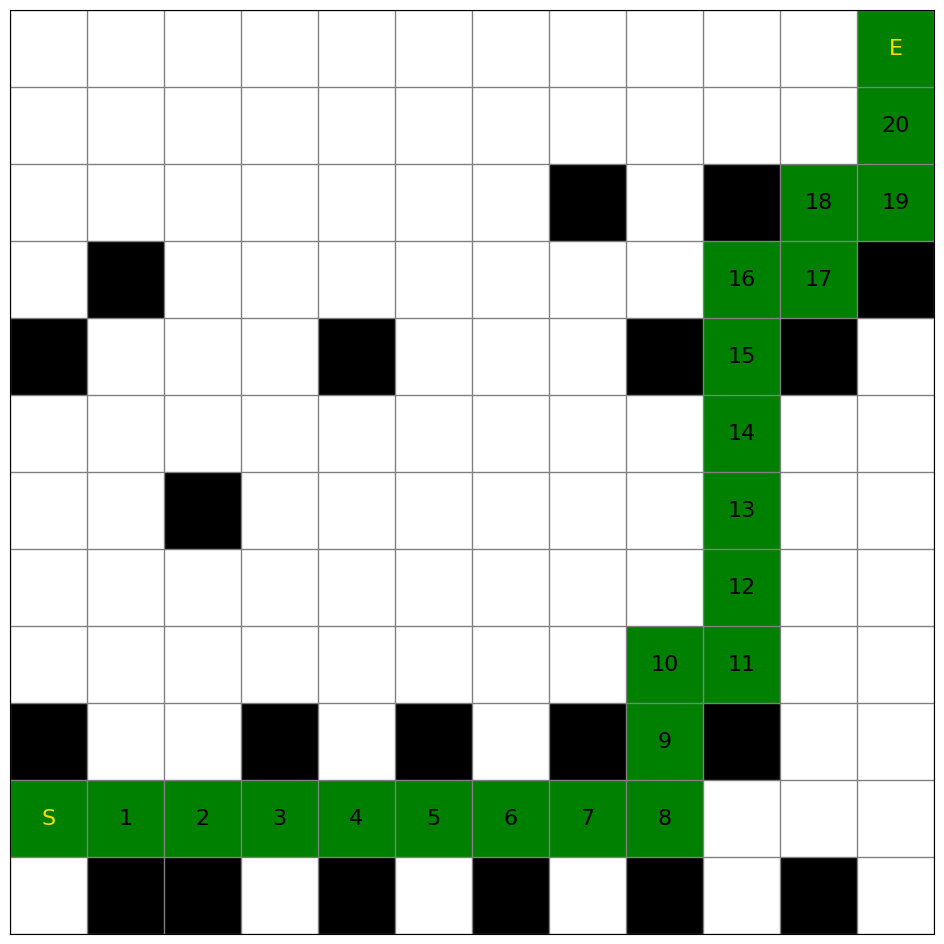

In [123]:
viz(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1),16,path)

In [124]:
import heapq

def a_star_path(matrix, start, goal):
    directions = [(0, -1), (0, 1), (-1, 0), (1, 0)] #up, down, left, right
    def heuristic(node):
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1]) #manhattan distance
    queue = [(heuristic(start), start, [start])]
    visited = set([start])
    while queue:
        f_cost, node, path = heapq.heappop(queue)
        if node == goal:
            return path, len(visited)
        for direction in directions:
            neighbor = (node[0] + direction[0], node[1] + direction[1])
            if (0 <= neighbor[0] < len(matrix) and 0 <= neighbor[1] < len(matrix[0]) and
                matrix[neighbor[0]][neighbor[1]] == 1):
                if neighbor not in visited:
                    g_cost = len(path) + 1
                    h_cost = heuristic(neighbor)
                    f_cost = g_cost + h_cost
                    
                    heapq.heappush(queue, (f_cost, neighbor, path + [neighbor]))
                    visited.add(neighbor)
    
    return None, len(visited)


In [129]:
mazebool1 = reset(3)

In [130]:
st = time.time()
path,visited_cells = a_star_path(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1))
et = time.time()
print(et-st)

0.0003230571746826172


In [131]:
visited_cells

59

In [132]:
print(mazebool1.shape[0]-2,0)
print(0,mazebool1.shape[1]-1)

13 0
0 14


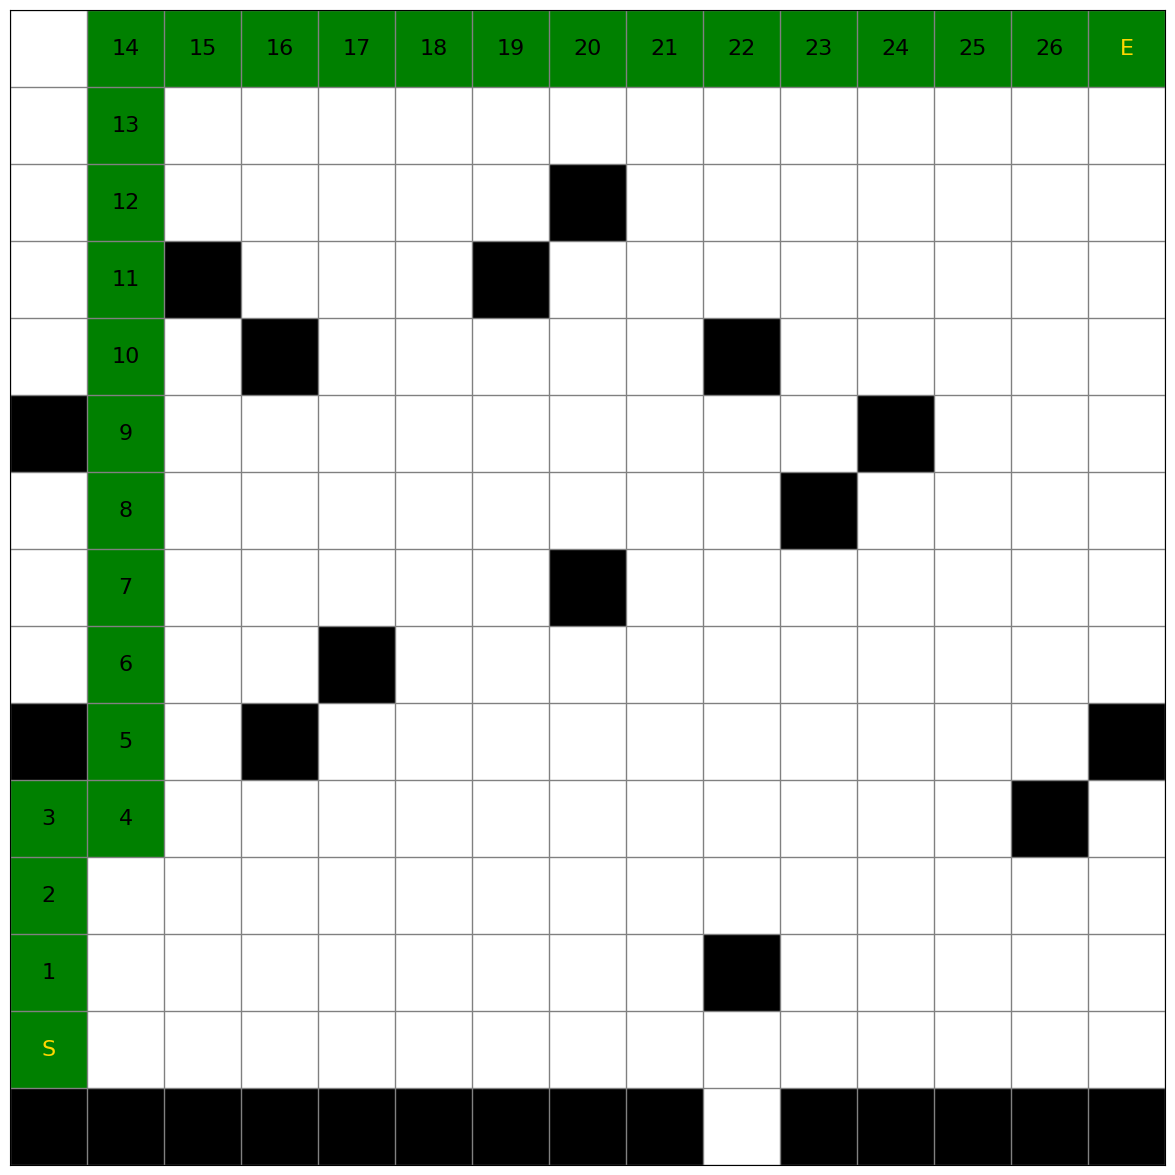

In [133]:
viz(mazebool1,(mazebool1.shape[0]-2,0),(0,mazebool1.shape[1]-1),16,path)

# MDP PROBLEMS (NON DETERMINISTICS AND CONSISTING PROBABILITY)

In [134]:
def getU(mazee, r, c, action):
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    dr, dc = actions[action]
    newr, newc = r+dr, c+dc
#     print(newr,newc)
    if newr < 0 or newc < 0 or newr >= rows or newc >= cols or (mazee[newr][newc] == 9): 
        return mazee[r][c]
    else:
        return mazee[newr][newc]

In [135]:
def statemaker(mazebool,rows,cols):
    k = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            if mazebool[i][j]==0:
                k[i][j] = 9
    return k
    

In [136]:
def getOptimalPolicy(U):
    policy = [[-1]*cols for i in range(rows)]
    for r in range(rows):
        for c in range(cols):
            if (r <= 1 and c == cols-1) or (U[r][c]==9):
                continue
            maxAction, maxU = None, -float("inf")
            for action in range(4):
                u = reward
                u += 0.1 * discount * getU(U, r, c, (action-1)%4)
                u += 0.8 * discount * getU(U, r, c, action)
                u += 0.1 * discount * getU(U, r, c, (action+1)%4)
                if u > maxU:
                    maxAction, maxU = action, u
            policy[r][c] = maxAction
    return policy

In [137]:
def printEnvironment(arr, policy=False):
    res = ""
    for r in range(rows):
        res += "|"
        for c in range(cols):
            if arr[r][c]==-1 and ((r!=0 or r!=1) and c!= cols-1):
                val = "WALL"
            elif r <= 1 and c == cols-1 :
                val = "+1" if r == 0 else "-1"
            else:
                if policy:
                    val = ["Up", "Down", "Left", "Right"][arr[r][c]]
                else:
                    val = str(arr[r][c])
            res += " " + val[:5].ljust(5) + " |" # format
        res += "\n"
    print(res)

In [138]:
def viz2(arr,fs):
    arr = np.array(arr)
    n_rows = arr.shape[0]
    n_cols = arr.shape[1]
    matrix = np.copy(arr)

    fig, ax = plt.subplots()
    fig.set_size_inches(n_cols, n_rows)
    
    
    for i in range(n_rows):
        for j in range(n_cols):
            
            if arr[i][j]==9:
                ax.text(j, i, 'Wall', ha='center', va='center', color='gold',fontsize = fs)
            elif arr[i][j]==1:
                ax.text(j, i, 1, ha='center', va='center', color='green',fontsize = fs)
            elif arr[i][j]==-1:
                ax.text(j, i, -1, ha='center', va='center', color='red',fontsize = fs)
                
            else:    
                ax.text(j, i, round(arr[i][j],2), ha='center', va='center', color='black',fontsize = fs)
            

    cmap = matplotlib.colors.ListedColormap(['white', 'black'])
    ax.imshow(matrix, cmap=cmap, origin='upper')
    ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.set_yticks(np.arange(-0.5, n_rows, 1))
    ax.grid(which='major', axis='y', color='grey', linestyle='-', linewidth=1)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()

In [139]:
def viz3(policy,arr,fs):
    arr = np.array(arr)
    n_rows = arr.shape[0]
    n_cols = arr.shape[1]
    matrix = np.copy(arr)

    fig, ax = plt.subplots()
    fig.set_size_inches(n_cols, n_rows)
    
    
    for i in range(n_rows):
        for j in range(n_cols):
            
            if arr[i][j]==9:
                ax.text(j, i, 'Wall', ha='center', va='center', color='gold',fontsize = fs)
                            
            elif arr[i][j]==1:    
                ax.text(j, i, 1, ha='center', va='center', color='green',fontsize = fs)
            elif arr[i][j]==-1:
                ax.text(j, i, -1, ha='center', va='center', color='red',fontsize = fs)
            elif policy[i][j]==0:
                
                ax.text(j, i, 'UP', ha='center', va='center', color='teal',fontsize = fs)
            elif policy[i][j]==1:
                ax.text(j, i, 'DOWN', ha='center', va='center', color='crimson',fontsize = fs)
            elif policy[i][j]==2:
                ax.text(j, i, 'LEFT', ha='center', va='center', color='magenta',fontsize = fs)
            elif policy[i][j]==3:
                ax.text(j, i, 'RIGHT', ha='center', va='center', color='blue',fontsize = fs)    

                
            

    cmap = matplotlib.colors.ListedColormap(['white', 'black'])
    ax.imshow(matrix, cmap=cmap, origin='upper')
    ax.set_xticks(np.arange(-0.5, n_cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, n_rows, 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
    ax.set_yticks(np.arange(-0.5, n_rows, 1))
    ax.grid(which='major', axis='y', color='grey', linestyle='-', linewidth=1)
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    plt.show()
    

In [140]:
def value_iteration(maze, reward, discount, epsilon, rows, cols, loosei, loosej, wini, winj):
    number_of_actions = 4 #up, down, left, right
    maze[loosei][loosej] = -1
    maze[wini][winj] = 1
    start_state = np.copy(maze)
    iterations = 0
    while(True):
        next_state = np.copy(start_state)
        error = 0
        for i in range(rows):
            for j in range(cols):
                if (i <= 1 and j == cols-1) or (maze[i][j] == 9):
                    continue
                all_states = []
                for action in range(number_of_actions):
                        u = reward
                        u += 0.1 * discount * getU(maze, i, j, (action-1)%4)
                        u += 0.8 * discount * getU(maze, i, j, action)
                        u += 0.1 * discount * getU(maze, i, j, (action+1)%4)
                        all_states.append(u)
                
                next_state[i][j] = max(all_states)

                error = max(error, abs(next_state[i][j]-maze[i][j]))
        iterations = iterations + 1
        maze = next_state
        if error < epsilon * (1-discount)/discount: 
            break
    print(iterations)
    return maze

55
0.05513286590576172


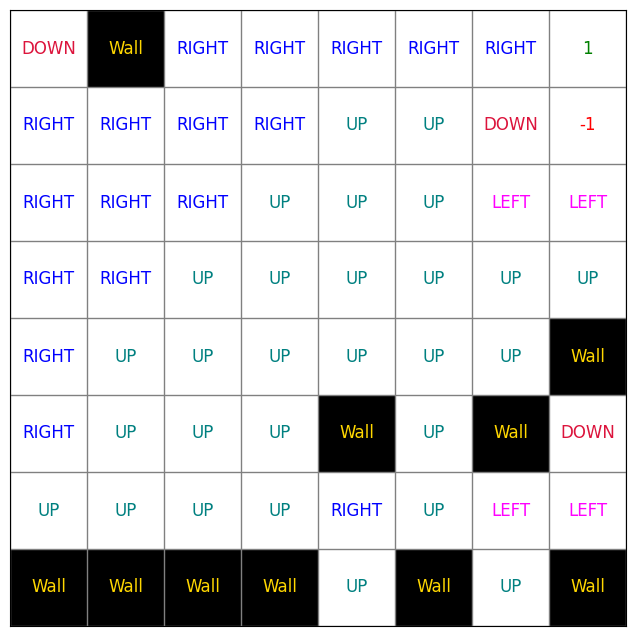

In [142]:
reward = 0
discount = 0.99
epsilon = 0.0001
mazebool1 = reset(1)
rows = mazebool1.shape[0]
cols = mazebool1.shape[1]
st = time.time()
U1 = value_iteration(statemaker(mazebool1,rows,cols),reward,discount,epsilon,rows,cols,1,cols-1,0,cols-1)
et = time.time()
print(et-st)
# viz2(U1,12)
U2 = getOptimalPolicy(U1)
# print(U2)
viz3(U2,U1,12)
# printEnvironment(U2, policy=True)


In [ ]:
reward = -0.1
discount = 0.99
epsilon = 0.0001
mazebool1 = reset(2)
rows = mazebool1.shape[0]
cols = mazebool1.shape[1]
U = value_iteration(statemaker(mazebool1,rows,cols),reward,discount,epsilon,rows,cols,1,cols-1,0,cols-1)
U = getOptimalPolicy(U)
printEnvironment(U, policy=True)

In [ ]:
reward = -0.1
discount = 0.99
epsilon = 0.0001
mazebool1 = reset(3)
rows = mazebool1.shape[0]
cols = mazebool1.shape[1]
U = value_iteration(statemaker(mazebool1,rows,cols),reward,discount,epsilon,rows,cols,1,cols-1,0,cols-1)
U = getOptimalPolicy(U)
printEnvironment(U, policy=True)

In [143]:
def calculateU(U, r, c, action):
    u = reward
    u += 0.1 * discount * getU(U, r, c, (action-1)%4)
    u += 0.8 * discount * getU(U, r, c, action)
    u += 0.1 * discount * getU(U, r, c, (action+1)%4)
    return u

In [144]:
def policy_iteration(policy, maze, reward, discount, epsilon, rows, cols, loosei, loosej, wini, winj):
    number_of_actions = 4 #up, down, left, right
    maze[loosei][loosej] = -1
    maze[wini][winj] = 1
    start_state = np.copy(maze)
    iterations = 0
    print("During the policy iteration:\n")
    interations = 0
    while(True):
        next_state = np.copy(start_state)
        error = 0
        for i in range(rows):
            for j in range(cols):
                if (i <= 1 and j == cols-1) or (maze[i][j] == 9):
                    continue
                next_state[i][j] = calculateU(maze, i, j, policy[i][j])
                error = max(error, abs(next_state[i][j]-maze[i][j]))

        maze = next_state
        
        if error < epsilon * (1-discount)/discount: 
            break    
            
        unchanged = True
        for i in range(rows):
            for j in range(cols):
                if (i <= 1 and j == cols-1) or (maze[i][j] == 9):
                    continue
                maxAction, maxU = None, -float("inf")
                for action in range(4):
                    u = calculateU(maze, i, j, action)
                    if u > maxU:
                        maxAction, maxU = action, u
                if maxU > calculateU(maze, i, j, policy[i][j]):
                    policy[i][j] = maxAction
                    unchanged = False
        if unchanged:
            break
        iterations = iterations + 1
#         printEnvironment(policy)
    print('iterations ',iterations)
    return policy


During the policy iteration:

iterations  30
0.18207430839538574


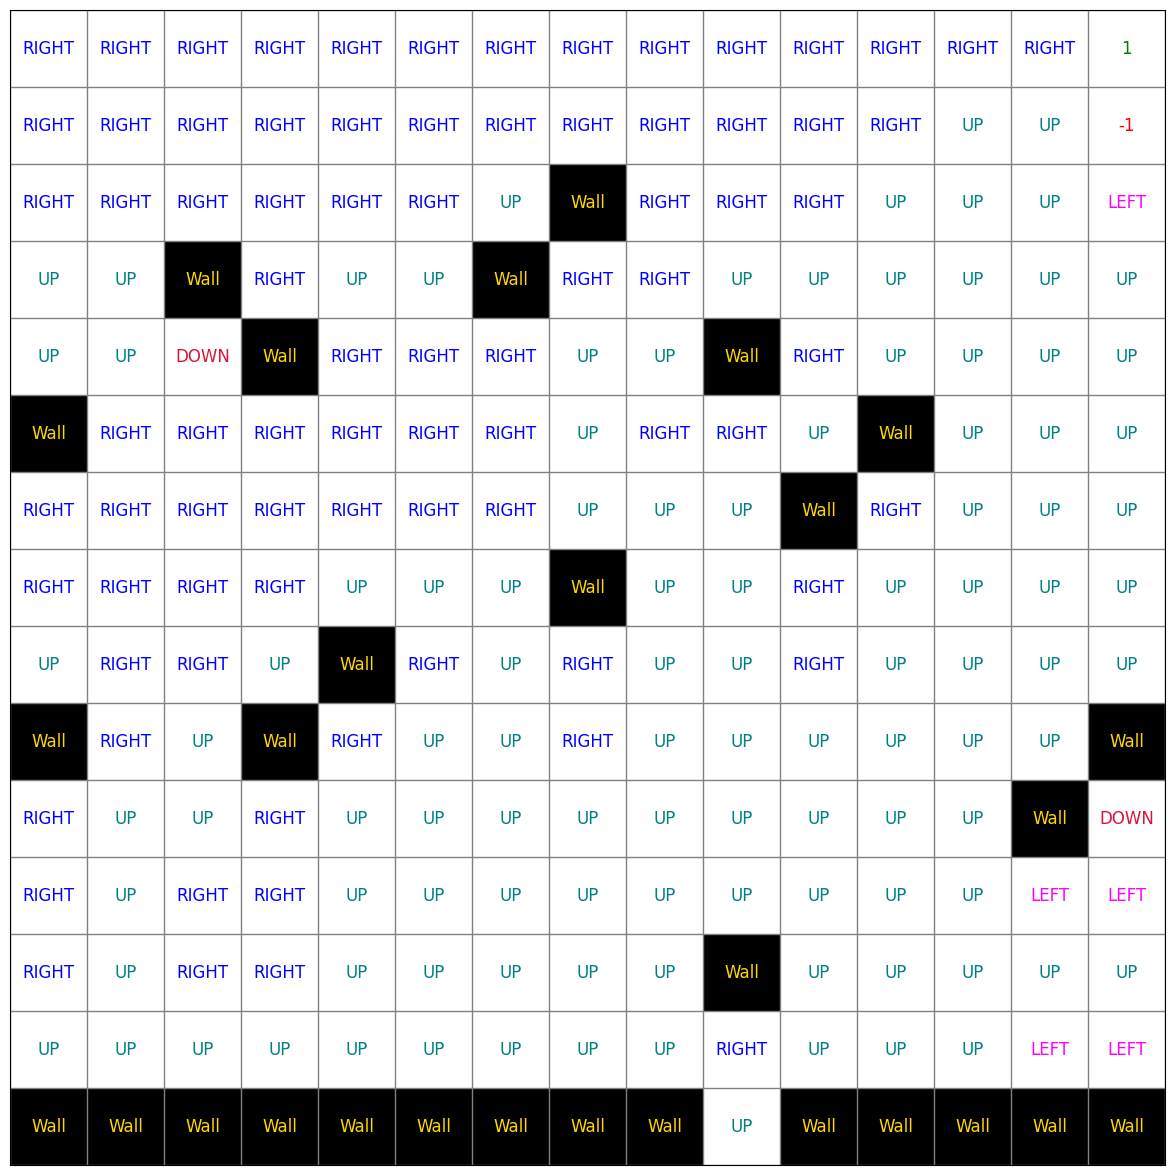

In [145]:
## 

reward = -0.3
discount = 0.99
epsilon = 0.0001
mazebool1 = reset(3)
rows = mazebool1.shape[0]
cols = mazebool1.shape[1]

policy = [[random.randint(0, 3) for j in range(cols)] for i in range(rows)]

# print("The initial random policy is:\n")
# printEnvironment(policy,policy = True)

st = time.time()

U = policy_iteration(policy, statemaker(mazebool1,rows,cols),reward,discount,epsilon,rows,cols,1,cols-1,0,cols-1)
et = time.time()

print(et-st)
# print(U)
# arr = np.copy(mazebool1)
# arr[1][cols-1] = -1
# arr[0][cols-1]
# viz3(U,statemaker(arr,rows,cols),12)

# print(U)
mazebool1 = statemaker(mazebool1,rows,cols)
mazebool1[1][cols-1] = -1
mazebool1[0][cols-1] = 1


viz3(U,mazebool1,12)
# print(mazebool1)

# print(U)
# print(statemaker(mazebool1,rows,cols))
# print(arr)
# print("The optimal policy is:\n")
# printEnvironment(U,policy = True)
